# Predicting Bank Customer Churn

### By Warren Berg

The goal of this project is to use Machine Learning models including K-Nearest Neighbor, Logistic Regression, Linear SVC, Decision Tree Classifier, and Random Forest Classifier to predict which customers will leave the bank.

This project involves 6 parts:
1. Data Exploration
2. Data Preparation
3. Exploratory Modeling
4. Feature Importance
5. Official Modeling
6. Conclusion

## 1. Data Exploration

In [119]:
# Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Import Data

churn = pd.read_csv('Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [503]:
# Churn rate for each Country

In [504]:
# Observe geographical locations in data set

churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [505]:
# divide data by country

# France
france_churn_data = churn[churn['Geography']=='France']

# Germany
germany_churn_data = churn[churn['Geography']=='Germany']

# Spain
spain_churn_data = churn[churn['Geography']=='Spain']

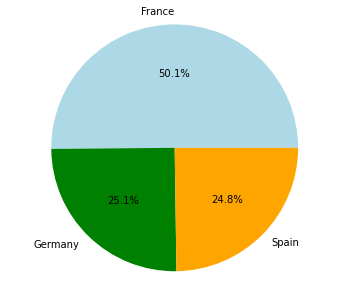

In [577]:
# visualize

labels = ['France', 'Germany', 'Spain']
values = [len(france_churn_data), len(germany_churn_data), len(spain_churn_data)]

fig, ax = plt.subplots(figsize=(6,5))

ax.pie(values, labels=labels,autopct='%1.1f%%', colors = ['lightblue', 'green', 'orange'])
ax.axis('equal')

plt.show()

In [507]:
# Determine Churn Rates for each Country

# Formula (per country) : # Accounts that Exited / Total # Accounts 

# France 
churn_rate_france = len(france_churn_data[france_churn_data['Exited']==1])/len(france_churn_data)

# Germany
churn_rate_germany = len(germany_churn_data[germany_churn_data['Exited']==1])/len(germany_churn_data)

# Spain
churn_rate_spain = len(spain_churn_data[spain_churn_data['Exited']==1])/len(spain_churn_data)

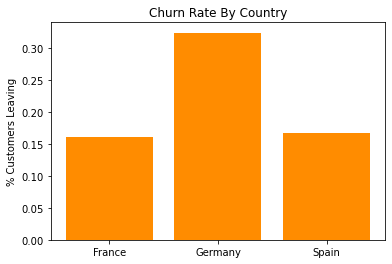

In [601]:
# visualize

# labels
positions = [1,2,3]
labels = ['France', 'Germany', 'Spain']
churn_rates = [churn_rate_france, churn_rate_germany, churn_rate_spain]

fig, ax = plt.subplots()

ax.bar(positions, churn_rates, label=labels, color = 'darkorange', tick_label=labels)
ax.set_ylabel('% Customers Leaving')

plt.title('Churn Rate By Country')

plt.show()

## 2. Data Preparation

In [45]:
# Slice Data into independent (xg) and dependant variables (yg)

# xg = columns we will use to train the data
# yg = column we want to predict 

xg, yg = churn.iloc[:, 3:-1], churn.iloc[:,-1]

In [46]:
# show columns we will use to train data

xg.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [49]:
# Column 'Exited' is the binary variable we are trying to predict

yg.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [53]:
# Convert categorical variables into dummy variables in xg

x_dummies = pd.get_dummies(xg)
x_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [ ]:
# Create Training/Test Data sets

In [59]:
# Import Package

from sklearn.model_selection import train_test_split

In [274]:
# seperate into training and test sets
# 75% train data
# 25% test data

x_train, x_test, y_train, y_test = train_test_split(x_dummies, yg, random_state=0)

In [275]:
x_train.shape

(7500, 13)

## 3. Exploratory Modeling

Now, we will train different models to try and predict if a customer will leave the bank based on the data

In [ ]:
### KNN Model

In [66]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier

In [276]:
# define K-Nearest Neighbors Model (n = 3)
knn_churn = KNeighborsClassifier(n_neighbors = 3)

# fit model
knn_churn.fit(x_dummies, yg)

KNeighborsClassifier(n_neighbors=3)

In [277]:
# Determine Accuracy for train/test sets

print('KNN accuracy on train: {:.2%}'.format(knn_churn.score(x_train, y_train)))
print('KNN accuracy on test: {:.2%}'.format(knn_churn.score(x_test, y_test)))

KNN accuracy on train: 84.20%
KNN accuracy on test: 83.56%


In [76]:
# Logistic Regression Model

In [278]:
# import

from sklearn.linear_model import LogisticRegression

In [279]:
# define Logistic Regression Model
log_reg = LogisticRegression()

# fit model
log_reg.fit(x_train, y_train)

LogisticRegression()

In [280]:
# Determine Accuracy for train/test sets

print('Logistic Regression accuracy on train: {:.2%}'.format(log_reg.score(x_train, y_train)))
print('Logistic Regression accuracy on test: {:.2%}'.format(log_reg.score(x_test, y_test)))

Logistic Regression accuracy on train: 79.09%
Logistic Regression accuracy on test: 78.76%


## 4. Feature Importance

Determine which features are important and should be included in model to improve accuracy

We will use two methods to determine feature importance
- chi-squared method
- Extra trees classifier

#### Chi-Squared method

The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population

$x^2 = \sum \frac{(observed - expected)^2}{expected}$

In [82]:
# import

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [89]:
# select 5 columns with highest chi-squared

best_x = SelectKBest(score_func=chi2, k=5)

SelectKBest(k=5, score_func=<function chi2 at 0x000002122AAFB700>)

In [100]:
# fit with data

best_fit = best_x.fit(x_dummies, yg)

In [113]:
# create Data Frame with best features

# chi squared scores
dfscores = pd.DataFrame(best_fit.scores_)

# columns 
dfcolumns = pd.DataFrame(x_dummies.columns)


# best features
best_features = pd.concat([dfcolumns, dfscores], axis=1)
best_features.columns=['Feature', 'Score']

# show the chi squared statistic for each column
best_features

,Feature,Score
0,CreditScore,1.054035e+02
1,Age,2.300417e+03
2,Tenure,3.270538e+00
3,Balance,7.151303e+06
4,NumOfProducts,5.055394e+00
5,HasCrCard,1.500410e-01
6,IsActiveMember,1.181994e+02
7,EstimatedSalary,4.835088e+04
8,Geography_France,5.492371e+01
9,Geography_Germany,2.254644e+02


In [316]:
# Show top features based on largest chi squared statistic

print(best_features.nlargest(6,'Score'))

             Feature         Score
3            Balance  7.151303e+06
7    EstimatedSalary  4.835088e+04
1                Age  2.300417e+03
9  Geography_Germany  2.254644e+02
6     IsActiveMember  1.181994e+02
0        CreditScore  1.054035e+02


#### Extra Trees Classifier

This class implements an estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [120]:
# import

from sklearn.ensemble import ExtraTreesClassifier

In [123]:
# Define Extra Trees Classifier
et = ExtraTreesClassifier()

# Fit Model
et.fit(x_dummies, yg)

ExtraTreesClassifier()

In [134]:
# Determine Feature Importance

ft_importance = pd.Series(et.feature_importances_, index=x_dummies.columns)
ft_importance.sort_values(ascending=False)

Age                  0.232660
NumOfProducts        0.143477
CreditScore          0.138044
EstimatedSalary      0.137305
Balance              0.134478
Tenure               0.105751
IsActiveMember       0.037571
HasCrCard            0.022357
Geography_Germany    0.020062
Geography_France     0.008883
Gender_Male          0.006725
Geography_Spain      0.006667
Gender_Female        0.006021
dtype: float64

In [317]:
# Based on the our findings above, we will choose the top features that appeared relevant in both the Chi-Squared and Extra Trees Classifier

In [318]:
# select data from top features (top 7 dependent variables)

x_new = x_dummies[['Age', 'NumOfProducts', 'CreditScore', 'EstimatedSalary', 'Balance', 'Tenure', 'IsActiveMember']]
x_new.head()

,Age,NumOfProducts,CreditScore,EstimatedSalary,Balance,Tenure,IsActiveMember
0,42,1,619,101348.88,0.00,2,1
1,41,1,608,112542.58,83807.86,1,1
2,42,3,502,113931.57,159660.80,8,0
3,39,2,699,93826.63,0.00,1,0
4,43,1,850,79084.10,125510.82,2,1


In [319]:
# Train, Test, Split with these variables

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new, yg, random_state=0)

## 5. Official Modeling

Having settled on a set number of features, we will now train the models again with the hope of improved accuracy

In [320]:
# KNN

In [321]:
# Define Model
knn_churn_2 = KNeighborsClassifier(n_neighbors=3)

# Fit Model
knn_churn_2.fit(x_new, yg)

KNeighborsClassifier(n_neighbors=3)

In [322]:
# Determine Accuracy for train/test sets

print('KNN accuracy on train: {:.2%}'.format(knn_churn_2.score(x_train2, y_train2)))
print('KNN accuracy on test: {:.2%}'.format(knn_churn_2.score(x_test2, y_test2)))

KNN accuracy on train: 84.20%
KNN accuracy on test: 83.56%


In [323]:
# Validation Curve

# Determine training and test scores for varying number of n_neighbors

# list of n neighbors
n_neighbors = [3,5,7,9,11]

# Scores for each n
train_score_knn, test_score_knn = validation_curve(KNeighborsClassifier(), x_new, yg, param_name='n_neighbors', param_range=n_neighbors, cv=4)

In [324]:
# Show results of Validation Curve

# define index
ind = ['n = 3', 'n = 5', 'n = 7', 'n = 9', 'n = 11']

# create DataFrame
tr_knn = pd.DataFrame(train_score_knn.mean(axis=1), index=ind)
tst_knn = pd.DataFrame(test_score_knn.mean(axis=1), index=ind)
knn_val_curve = pd.concat([tr_knn, tst_knn], axis=1)

# rename columns
knn_val_curve.columns = ['Train', 'Test']

# Display Results
print(knn_val_curve)

print('')
print('Average cross validation scores on train and test set for each n')

           Train    Test
n = 3   0.842233  0.7341
n = 5   0.816000  0.7646
n = 7   0.806733  0.7767
n = 9   0.801667  0.7823
n = 11  0.799767  0.7864

Average cross validation scores on train and test set for each n


In [325]:
# Logistic Regression

In [326]:
# Define model
log_reg2 = LogisticRegression()

# Fit Model
log_reg2.fit(x_train2, y_train2)

LogisticRegression()

In [327]:
print('Logistic Regression Accuracy on train: {:.2%}'.format(log_reg2.score(x_train2, y_train2)))
print('Logistic Regression Accuracy on test: {:.2%}'.format(log_reg2.score(x_test2, y_test2)))

Logistic Regression Accuracy on train: 79.09%
Logistic Regression Accuracy on test: 78.76%


In [426]:
# Validation Curve

# Determine training and test scores for varying number of c_range
# c value represents regularization strength - smaller values specify stronger regularization.

c_range = [.1, .5, 1, 5, 10, 100, 200]

# scores for each c
train_score_lr, test_score_lr = validation_curve(LogisticRegression(), x_new, yg, param_name='C', param_range=c_range, cv=4)

In [429]:
# Show results of Validation Curve

# define index
c_range = [.1, .5, 1, 5, 10, 100, 200]

# create DataFrame
tr_lr = pd.DataFrame(train_score_lr.mean(axis=1), index=c_range)
tst_lr = pd.DataFrame(test_score_lr.mean(axis=1), index=c_range)
lr_val_curve = pd.concat([tr_lr, tst_lr], axis=1)

# rename columns
lr_val_curve.columns = ['Train', 'Test']

# Display Results
print(lr_val_curve)

print('')
print('Average cross validation scores on train and test set for each C')

          Train    Test
0.1    0.790133  0.7906
0.5    0.790133  0.7906
1.0    0.790133  0.7906
5.0    0.790133  0.7906
10.0   0.790133  0.7906
100.0  0.790133  0.7906
200.0  0.790133  0.7906

Average cross validation scores on train and test set for each C


In [330]:
# Linear SVC

In [331]:
# import

from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

In [332]:
# MinMaxScaler
# Transform features by scaling each feature to a given range.

# define
scaler = MinMaxScaler()

# fit
x_trans = scaler.fit_transform(x_new)

In [333]:
# train, test, split with scaled data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_trans, yg, random_state=0)

In [334]:
# Linear SVM

In [335]:
# Define
svm = LinearSVC(C=0.1, random_state=0)

# Fit
svm.fit(x_train3, y_train3)

LinearSVC(C=0.1, random_state=0)

In [336]:
print('SVM accuracy on train: {:.2%}'.format(svm.score(x_train3, y_train3)))
print('SVM accuracy on test: {:.2%}'.format(svm.score(x_test3, y_test3)))

SVM accuracy on train: 80.07%
SVM accuracy on test: 79.92%


In [337]:
# Validation Curve

# Determine training and test scores for varying number of c_range
# c value represents regularization strength - smaller values specify stronger regularization.

c_range = [.1, .5, 1, 5, 10, 100, 200]

# scores for each c
train_score_svm, test_score_svm = validation_curve(LinearSVC(random_state=0, max_iter=50000), x_trans, yg, param_name='C', param_range=c_range, cv=4)

In [338]:
# Show results of Validation Curve

# define index
c_range = [.1, .5, 1, 5, 10, 100, 200]

# create DataFrame
tr_svm = pd.DataFrame(train_score_svm.mean(axis=1), index=c_range)
tst_svm = pd.DataFrame(test_score_svm.mean(axis=1), index=c_range)
svm_val_curve = pd.concat([tr_svm, tst_svm], axis=1)

# rename columns
svm_val_curve.columns = ['Train', 'Test']

# Display Results
print(svm_val_curve)

print('')
print('Average cross validation scores on train and test set for each C')

          Train    Test
0.1    0.801400  0.8001
0.5    0.801267  0.8000
1.0    0.801367  0.8002
5.0    0.801333  0.8001
10.0   0.801333  0.8001
100.0  0.801367  0.8001
200.0  0.801367  0.8001

Average cross validation scores on train and test set for each C


In [339]:
# Decision Tree

In [340]:
# import

from sklearn.tree import DecisionTreeClassifier

In [341]:
# Define
dt = DecisionTreeClassifier(random_state=0, max_depth=3)

# fit
dt.fit(x_train2, y_train2)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [342]:
print('Decision Tree accuracy on train: {:.2%}'.format(dt.score(x_train2, y_train2)))
print('Decision Tree accuracy on test: {:.2%}'.format(dt.score(x_test2, y_test2)))

Decision Tree accuracy on train: 83.92%
Decision Tree accuracy on test: 84.16%


In [344]:
# Validation Curve

# Determine training and test scores for varying max_depth

max_depth = [5,10,15]

train_score_dt, test_score_dt = validation_curve(DecisionTreeClassifier(), x_new, yg, param_name='max_depth', param_range=max_depth, cv=4)

In [345]:
# Show results of Validation Curve

# define index
max_depth = [5,10,15]

# create DataFrame
tr_dt = pd.DataFrame(train_score_dt.mean(axis=1), index=max_depth)
tst_dt = pd.DataFrame(test_score_dt.mean(axis=1), index=max_depth)
dt_val_curve = pd.concat([tr_dt, tst_dt], axis=1)

# rename columns
dt_val_curve.columns = ['Train', 'Test']

# Display Results
print(dt_val_curve)

print('')
print('Average cross validation scores on train and test set for each max_depth')

       Train    Test
5   0.858700  0.8532
10  0.895933  0.8313
15  0.958533  0.8011

Average cross validation scores on train and test set for each max_depth


In [346]:
# Random Forest

In [347]:
# import

from sklearn.ensemble import RandomForestClassifier

In [348]:
# Define
rf = RandomForestClassifier(n_estimators=500, random_state=10, max_leaf_nodes=20)

# Fit
rf.fit(x_train2, y_train2)

RandomForestClassifier(max_leaf_nodes=20, n_estimators=500, random_state=10)

In [349]:
print('Random Forest Accuracy on train: {:.2%}'.format(rf.score(x_train2, y_train2)))
print('Random Forest Accuracy on test: {:.2%}'.format(rf.score(x_test2, y_test2)))

Random Forest Accuracy on train: 85.75%
Random Forest Accuracy on test: 86.12%


In [350]:
# Validation Curve

# Determine training and test scores for varying max_depth

max_leaf_nodes = [10, 15, 20, 30, 40]

train_score_rf, test_score_rf = validation_curve(RandomForestClassifier(), x_new, yg, param_name='max_leaf_nodes', param_range=max_leaf_nodes, cv=4)

In [351]:
# Show results of Validation Curve

# define index
max_leaf_nodes = [10, 15, 20, 30, 40]

# create DataFrame
tr_rf = pd.DataFrame(train_score_rf.mean(axis=1), index=max_leaf_nodes)
tst_rf = pd.DataFrame(test_score_rf.mean(axis=1), index=max_leaf_nodes)
rf_val_curve = pd.concat([tr_rf, tst_rf], axis=1)

# rename columns
rf_val_curve.columns = ['Train', 'Test']

# Display Results
print(rf_val_curve)

print('')
print('Average cross validation scores on train and test set for max_leaf_nodes')

       Train    Test
10  0.851900  0.8484
15  0.857467  0.8537
20  0.858800  0.8546
30  0.861000  0.8554
40  0.863033  0.8562

Average cross validation scores on train and test set for max_leaf_nodes


## 6. Conclusion

In comparing results from the validation curve of each model, we can compare model accuracy and determine which model is best used to predict Bank Customer Churn

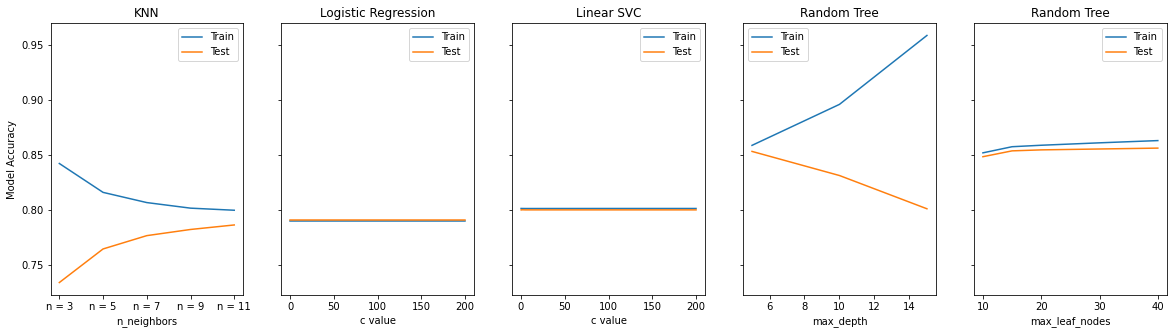

In [476]:
# Visualize Accuracy of Models

fig, axs = plt.subplots(1, 5, sharey=True, figsize=(20, 5))

# knn
axs[0].plot(knn_val_curve.iloc[:,0])
axs[0].plot(knn_val_curve.iloc[:,1])
axs[0].set_yticks(np.arange(0.7, 1.0, .05))
axs[0].set_xlabel('n_neighbors')
axs[0].set_ylabel('Model Accuracy')
axs[0].set_title('KNN')
axs[0].legend(['Train', 'Test'])

# logistic regression
axs[1].plot(lr_val_curve.iloc[:,0])
axs[1].plot(lr_val_curve.iloc[:,1])
axs[1].set_title('Logistic Regression')
axs[1].set_xlabel('c value')
axs[1].legend(['Train', 'Test'])

# linear SVC
axs[2].plot(svm_val_curve.iloc[:,0])
axs[2].plot(svm_val_curve.iloc[:,1])
axs[2].set_title('Linear SVC')
axs[2].set_xlabel('c value')
axs[2].legend(['Train', 'Test'])

# Random Tree Classifier
axs[3].plot(dt_val_curve.iloc[:,0])
axs[3].plot(dt_val_curve.iloc[:,1])
axs[3].set_title('Random Tree')
axs[3].set_xlabel('max_depth')
axs[3].legend(['Train', 'Test'])

# Random Forest
axs[4].plot(rf_val_curve.iloc[:,0])
axs[4].plot(rf_val_curve.iloc[:,1])
axs[4].set_title('Random Tree')
axs[4].set_xlabel('max_leaf_nodes')
axs[4].legend(['Train', 'Test'])


plt.show()

As we can see, the Random Tree model has the best accuracy of all the models we trained, correctly predicting that a customer will leave the bank 85.62% of the time. That being said, none of these models has a high enough accuracy to effectively be put into practice. 

The biggest flaw in this data set is that it has only 10,000 rows. We would need much more data to train a model a better model and improve the accuracy of predictions.

Thanks for checking out my project!